# Adaptive histogram

This type of histogram automatically adapts bins when new values are added. Note that only fixed-width continuous binning scheme is currently supported.

In [1]:
# Necessary import evil
import physt
from physt import h1, h2, histogramdd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create an empty histogram
h = h1(None, "fixed_width", bin_width=10, name="People height", axis_name="cm", adaptive=True)
h

Histogram1D('People height', bins=(0,), total=0, dtype=int64)

## Adding single values

Histogram1D('People height', bins=(1,), total=1, dtype=int64)

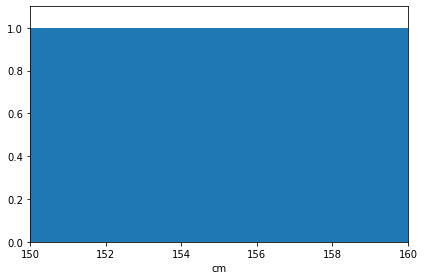

In [3]:
# Add a first value
h.fill(157)
h.plot()
h

<AxesSubplot:xlabel='cm'>

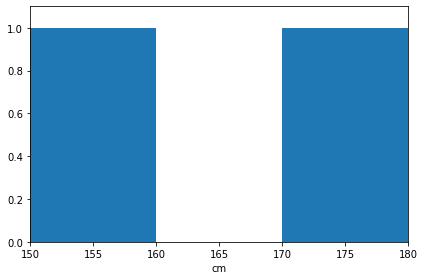

In [4]:
# Add a second value
h.fill(173)
h.plot()

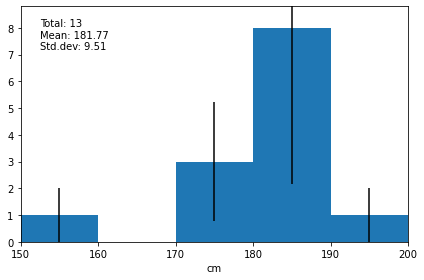

In [5]:
# Add a few more values, including weights
h.fill(173, 2)
h.fill(186, 5)
h.fill(188, 3)
h.fill(193, 1)
h.plot(errors=True, show_stats=True);

## Adding multiple values at once

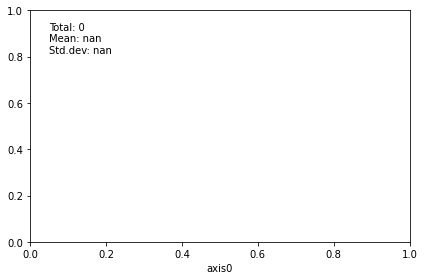

In [6]:
ha = h1(None, "fixed_width", bin_width=10, adaptive=True)
ha.plot(show_stats=True);

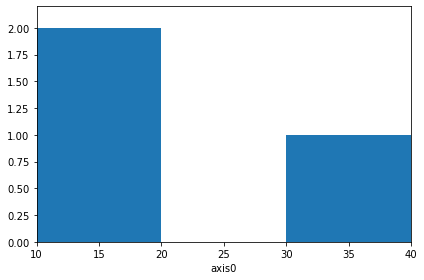

In [7]:
# Beginning
ha.fill_n([10, 11, 34])
ha.plot();

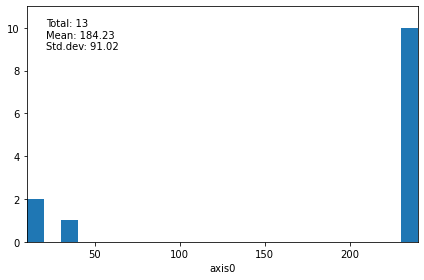

In [8]:
# Add a distant value
ha.fill_n([234], weights=[10])
ha.plot(show_stats=True);

In [9]:
# Let's create a huge dataset
values = np.random.normal(130, 20, 100000)

In [10]:
%%time
# Add lots of values (no loop in Python)
hn = h1(None, "fixed_width", bin_width=10, adaptive=True)
hn.fill_n(values)
# ha.plot()

CPU times: user 16.4 ms, sys: 24.5 ms, total: 40.9 ms
Wall time: 16.6 ms


In [11]:
%%time
# Comparison with Python loop
hp = h1(None, "fixed_width", bin_width=10, adaptive=True)
for value in values:
    hp.fill(value)

CPU times: user 5.02 s, sys: 182 ms, total: 5.2 s
Wall time: 4.98 s


Equal? True


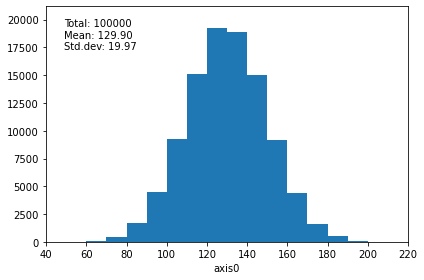

In [12]:
# Hopefully equal results
print("Equal?", hp == hn)
hp.plot(show_stats=True);

## Adding two adaptive histograms together

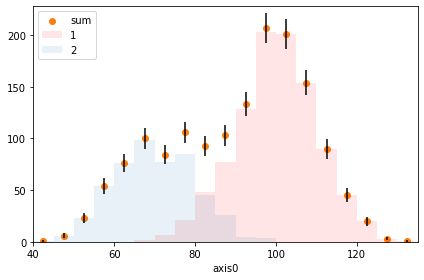

In [13]:
ha1 = h1(None, "fixed_width", bin_width=5, adaptive=True)
ha1.fill_n(np.random.normal(100, 10, 1000))

ha2 = h1(None, "fixed_width", bin_width=5, adaptive=True)
ha2.fill_n(np.random.normal(70, 10, 500))

ha = ha1 + ha2

fig, ax= plt.subplots()

ha1.plot(alpha=0.1, ax=ax, label="1", color="red")
ha2.plot(alpha=0.1, ax=ax, label="2")

ha.plot("scatter", label="sum", ax=ax, errors=True)

ax.legend(loc=2);   # TODO? Why don't we show the sum???